In [1]:
import pandas as pd
import joblib

df = pd.read_csv("../data/processed/churn_predictions.csv")

X = df[["Recency", "Frequency", "Monetary", "Cluster"]]
y = df["Churn"]


In [2]:
pip install shap

   ---------------------------------------- 0.0/549.1 kB ? eta -:--:--
   ------------------- -------------------- 262.1/549.1 kB ? eta -:--:--
   ---------------------------------------- 549.1/549.1 kB 4.3 MB/s  0:00:00

   -------------------- ------------------- 1/2 [shap]
   -------------------- ------------------- 1/2 [shap]
   ---------------------------------------- 2/2 [shap]

Note: you may need to restart the kernel to use updated packages.


In [3]:
import shap

In [4]:
import os
os.makedirs("../models", exist_ok=True)

In [5]:
import pandas as pd

df = pd.read_csv("../data/processed/churn_predictions.csv")

X = df[["Recency", "Frequency", "Monetary", "Cluster"]]
y = df["Churn"]

In [6]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(
    n_estimators=200,
    max_depth=6,
    random_state=42,
    class_weight="balanced"
)

rf_model.fit(X, y)

,n_estimators,200
,criterion,'gini'
,max_depth,6
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [7]:
import joblib

joblib.dump(rf_model, "../models/rf_churn_model.pkl")

['../models/rf_churn_model.pkl']

In [8]:
rf_model = joblib.load("../models/rf_churn_model.pkl")


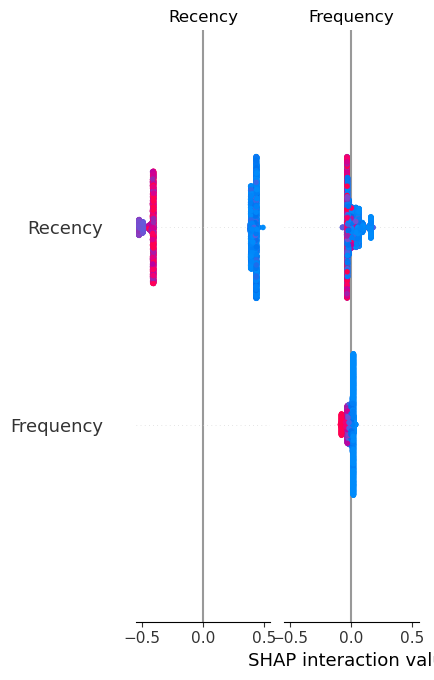

In [10]:
# shap is already imported in another cell
explainer = shap.TreeExplainer(rf_model)
shap_values_all = explainer.shap_values(X)

# Normalize shap_values to a (n_samples, n_features) array for plotting
import numpy as np

if isinstance(shap_values_all, list):
	if len(shap_values_all) == 2:
		# binary classification: use the positive class explanations
		shap_values = shap_values_all[1]
	else:
		# multiclass: pick the class with highest mean absolute SHAP value
		mean_abs = [np.abs(sv).mean() for sv in shap_values_all]
		idx = int(np.argmax(mean_abs))
		shap_values = shap_values_all[idx]
else:
	shap_values = shap_values_all

shap.summary_plot(shap_values, X)
